In [3]:
import sys
sys.path.append('C:/Users/mesfi/OneDrive/Desktop/han AAU Training/10Acadamy/week1/Week-1-Analytics_in_telecommunication')
import pandas as pd
from scripts.process_data import get_df
from scripts.postgres_connection import connect_to_postgres 
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.0f' % x)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [4]:
df = get_df()
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589


In [5]:
#Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
# Average TCP retransmission
#Average RTT
#Handset type
#Average throughput

analytics_columns = [
    'MSISDN/Number',
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)',
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'Handset Type',

    #through put
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)',
]

num_columns = [
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)',
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    #through put
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)',
]

df = df[analytics_columns]
# drop the NaNs of handset type column becuase it is a string field and doesn't have mean
df_cleaned_handset=df.dropna(subset=['Handset Type'])

df_cleaned_handset 



,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,33664962239,42,5,NaN,NaN,Samsung Galaxy A5 Sm-A520F,23,44
1,33681854413,65,5,NaN,NaN,Samsung Galaxy J5 (Sm-J530),16,26
2,33760627129,NaN,NaN,NaN,NaN,Samsung Galaxy A8 (2018),6,9
3,33750343200,NaN,NaN,NaN,NaN,undefined,44,44
4,33699795932,NaN,NaN,NaN,NaN,Samsung Sm-G390F,6,9
...,...,...,...,...,...,...,...,...
149995,33668648496,313,9,16552848,162614,undefined,63420,1393
149996,33650688697,32,0,NaN,NaN,Apple iPhone 8 Plus (A1897),52,65
149997,33663449963,27,2,NaN,NaN,Apple iPhone Se (A1723),23,54
149998,33621890103,43,6,NaN,NaN,Apple iPhone Xs (A2097),43,47


In [6]:

lower_percentile = 1
upper_percentile = 99

lower_bounds = df_cleaned_handset[num_columns].quantile(lower_percentile / 100)
upper_bounds = df_cleaned_handset[num_columns].quantile(upper_percentile / 100)

for col in num_columns:
    outliers = (df_cleaned_handset[col] < lower_bounds[col]) | (df_cleaned_handset[col] > upper_bounds[col])
    if col  == 'Avg Bearer TP DL (kbps)':
    
     df_cleaned_handset[col] = df_cleaned_handset[col].mask(outliers, df_cleaned_handset[col].mean())

df_cleaned_handset



C:\Users\mesfi\AppData\Local\Temp\ipykernel_9468\3361229914.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_handset[col] = df_cleaned_handset[col].mask(outliers, df_cleaned_handset[col].mean())


,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,33664962239,42,5,NaN,NaN,Samsung Galaxy A5 Sm-A520F,23,44
1,33681854413,65,5,NaN,NaN,Samsung Galaxy J5 (Sm-J530),16,26
2,33760627129,NaN,NaN,NaN,NaN,Samsung Galaxy A8 (2018),6,9
3,33750343200,NaN,NaN,NaN,NaN,undefined,44,44
4,33699795932,NaN,NaN,NaN,NaN,Samsung Sm-G390F,6,9
...,...,...,...,...,...,...,...,...
149995,33668648496,313,9,16552848,162614,undefined,63420,1393
149996,33650688697,32,0,NaN,NaN,Apple iPhone 8 Plus (A1897),52,65
149997,33663449963,27,2,NaN,NaN,Apple iPhone Se (A1723),23,54
149998,33621890103,43,6,NaN,NaN,Apple iPhone Xs (A2097),43,47


In [7]:
# replace the NaN value by mean
df_clean_nan = df_cleaned_handset.copy()
df_clean_nan[num_columns] = df_clean_nan[num_columns].fillna(df_clean_nan[num_columns].mean())
df_clean_nan

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,33664962239,42,5,20826090,764055,Samsung Galaxy A5 Sm-A520F,23,44
1,33681854413,65,5,20826090,764055,Samsung Galaxy J5 (Sm-J530),16,26
2,33760627129,108,18,20826090,764055,Samsung Galaxy A8 (2018),6,9
3,33750343200,108,18,20826090,764055,undefined,44,44
4,33699795932,108,18,20826090,764055,Samsung Sm-G390F,6,9
...,...,...,...,...,...,...,...,...
149995,33668648496,313,9,16552848,162614,undefined,63420,1393
149996,33650688697,32,0,20826090,764055,Apple iPhone 8 Plus (A1897),52,65
149997,33663449963,27,2,20826090,764055,Apple iPhone Se (A1723),23,54
149998,33621890103,43,6,20826090,764055,Apple iPhone Xs (A2097),43,47


In [8]:
# Create sum columns for each UL and DL pair

df_clean_nan['Sum RTT'] = df_clean_nan['Avg RTT DL (ms)'] + df_clean_nan['Avg RTT UL (ms)']
df_clean_nan['Sum TCP Retrans. Vol (Bytes)'] = df_clean_nan['TCP DL Retrans. Vol (Bytes)'] + df_clean_nan['TCP UL Retrans. Vol (Bytes)']
df_clean_nan['Sum Bearer TP'] = df_clean_nan['Avg Bearer TP DL (kbps)'] + df_clean_nan['Avg Bearer TP UL (kbps)']

# Rename columns without DL and UL
df_clean_nan = df_clean_nan.rename(columns={
    'Avg RTT DL (ms)': 'Avg RTT DL',
    'Avg RTT UL (ms)': 'Avg RTT UL',
    'TCP DL Retrans. Vol (Bytes)': 'TCP Retrans. Vol DL',
    'TCP UL Retrans. Vol (Bytes)': 'TCP Retrans. Vol UL',
    'Avg Bearer TP DL (kbps)': 'Avg Bearer TP DL',
    'Avg Bearer TP UL (kbps)': 'Avg Bearer TP UL',
})

df_clean_nan


,MSISDN/Number,Avg RTT DL,Avg RTT UL,TCP Retrans. Vol DL,TCP Retrans. Vol UL,Handset Type,Avg Bearer TP DL,Avg Bearer TP UL,Sum RTT,Sum TCP Retrans. Vol (Bytes),Sum Bearer TP
0,33664962239,42,5,20826090,764055,Samsung Galaxy A5 Sm-A520F,23,44,47,21590145,67
1,33681854413,65,5,20826090,764055,Samsung Galaxy J5 (Sm-J530),16,26,70,21590145,42
2,33760627129,108,18,20826090,764055,Samsung Galaxy A8 (2018),6,9,126,21590145,15
3,33750343200,108,18,20826090,764055,undefined,44,44,126,21590145,88
4,33699795932,108,18,20826090,764055,Samsung Sm-G390F,6,9,126,21590145,15
...,...,...,...,...,...,...,...,...,...,...,...
149995,33668648496,313,9,16552848,162614,undefined,63420,1393,322,16715462,64813
149996,33650688697,32,0,20826090,764055,Apple iPhone 8 Plus (A1897),52,65,32,21590145,117
149997,33663449963,27,2,20826090,764055,Apple iPhone Se (A1723),23,54,29,21590145,77
149998,33621890103,43,6,20826090,764055,Apple iPhone Xs (A2097),43,47,49,21590145,90


In [9]:
important_columns = [
    'MSISDN/Number',
    'Handset Type',
    'Sum RTT',
    'Sum TCP Retrans. Vol (Bytes)',
    'Sum Bearer TP'
]

num_important_columns  = [
    'Sum RTT',
    'Sum TCP Retrans. Vol (Bytes)',
    'Sum Bearer TP'
]

df_important = df_clean_nan[important_columns]
df_important

,MSISDN/Number,Handset Type,Sum RTT,Sum TCP Retrans. Vol (Bytes),Sum Bearer TP
0,33664962239,Samsung Galaxy A5 Sm-A520F,47,21590145,67
1,33681854413,Samsung Galaxy J5 (Sm-J530),70,21590145,42
2,33760627129,Samsung Galaxy A8 (2018),126,21590145,15
3,33750343200,undefined,126,21590145,88
4,33699795932,Samsung Sm-G390F,126,21590145,15
...,...,...,...,...,...
149995,33668648496,undefined,322,16715462,64813
149996,33650688697,Apple iPhone 8 Plus (A1897),32,21590145,117
149997,33663449963,Apple iPhone Se (A1723),29,21590145,77
149998,33621890103,Apple iPhone Xs (A2097),49,21590145,90


In [10]:
#Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
#Average TCP retransmission
#Average RTT
#Handset type
#Average throughput

# List of columns to include in the groupby and sum
num_important_columns = [
    'Sum RTT',
    'Sum TCP Retrans. Vol (Bytes)',
    'Sum Bearer TP'
]

# Group by 'MSISDN/Number' and sum the values for each group
grouped_df = df_important.groupby('MSISDN/Number')[num_important_columns].sum().reset_index()

# Display the grouped DataFrame
grouped_df.head(10)

,MSISDN/Number,Sum RTT,Sum TCP Retrans. Vol (Bytes),Sum Bearer TP
0,33601001722,46,21590145,76
1,33601001754,31,21590145,99
2,33601002511,126,21590145,97
3,33601007832,84,765121,248
4,33601008617,119,30960977,56844
5,33601010682,150,22356960,7908
6,33601011634,53,21700377,42513
7,33601011959,52,764333,1247
8,33601014694,252,43180290,189
9,33601020306,62,20827384,146


In [11]:
#Compute & list 10 of the top,bottom and most frequent TCP values

top_tcp_values = df_important['Sum TCP Retrans. Vol (Bytes)'].nlargest(10)
bottom_tcp_values = df_important['Sum TCP Retrans. Vol (Bytes)'].nsmallest(10)
most_frequent_tcp_values = df_important['Sum TCP Retrans. Vol (Bytes)'].mode()

print("Top TCP Values:")
print(top_tcp_values)

print("\nBottom TCP Values:")
print(bottom_tcp_values)

print("\nMost Frequent TCP Values:")
print(most_frequent_tcp_values)



Top TCP Values:
34645    4344115651
140813   4301477439
77979    4294431965
135678   4291464950
3782     4288120860
119684   4275491713
39637    4268647350
59016    4261616039
76990    4260174145
41209    4254659643
Name: Sum TCP Retrans. Vol (Bytes), dtype: float64

Bottom TCP Values:
143594    86
111113    97
18432    106
13157    108
97070    113
8816     128
99959    129
83227    134
95966    134
12866    143
Name: Sum TCP Retrans. Vol (Bytes), dtype: float64

Most Frequent TCP Values:
0   21590145
Name: Sum TCP Retrans. Vol (Bytes), dtype: float64


In [12]:
#Compute & list 10 of the top,bottom and most frequent RTT values
top_rtt_values = df_important['Sum RTT'].nlargest(10)
bottom_rtt_values = df_important['Sum RTT'].nsmallest(10)
most_frequent_rtt_values = df_important['Sum RTT'].mode()

print("Top RTT Values:")
print(top_rtt_values)

print("\nBottom RTT Values:")
print(bottom_rtt_values)

print("\nMost Frequent RTT Values:")
print(most_frequent_rtt_values)




Top RTT Values:
30166    96924
29927    64641
5989     54848
22851    27278
23455    26300
1373     25922
81274    25715
97321    25388
100584   24738
97915    20980
Name: Sum RTT, dtype: float64

Bottom RTT Values:
42612    0
103328   0
124544   0
143878   0
71739    2
50974    4
144923   4
103549   5
8778     6
123219   6
Name: Sum RTT, dtype: float64

Most Frequent RTT Values:
0   126
Name: Sum RTT, dtype: float64


In [13]:
#Compute & list 10 of the top,bottom and most frequent Throughput values
top_throughput_values = df_important['Sum Bearer TP'].nlargest(10)
bottom_throughput_values = df_important['Sum Bearer TP'].nsmallest(10)
most_frequent_throughput_values = df_important['Sum Bearer TP'].mode()

print("Top Throughput Values:")
print(top_throughput_values)

print("\nBottom Throughput Values:")
print(bottom_throughput_values)

print("\nMost Frequent Throughput Values:")
print(most_frequent_throughput_values)



Top Throughput Values:
116895   158580
117473   147595
47784    145436
47023    145401
141636   145084
140663   144694
146937   143813
143186   143265
39287    142605
71945    141798
Name: Sum Bearer TP, dtype: float64

Bottom Throughput Values:
9484     6
24541    6
44296    6
45013    6
51918    6
116292   6
125051   6
136937   6
49805    7
56169    7
Name: Sum Bearer TP, dtype: float64

Most Frequent Throughput Values:
0   63
Name: Sum Bearer TP, dtype: float64


In [14]:
# Distribution of the average throughput per handset type
average_throughput_per_handset = df_important.groupby('Handset Type')['Sum Bearer TP'].mean().reset_index()
print("Distribution of Average Throughput per Handset Type:")
print(average_throughput_per_handset)

# Distribution of the avg TCP retransmission view per handset type
avg_tcp_r_per_handset = df_important.groupby('Handset Type')['Sum TCP Retrans. Vol (Bytes)'].mean().reset_index()
print("Distribution of Average TCP Retransmission per Handset Type:")
avg_tcp_r_per_handset


Distribution of Average Throughput per Handset Type:
                                           Handset Type  Sum Bearer TP
0                            A-Link Telecom I. Cubot A5          23510
1                     A-Link Telecom I. Cubot Note Plus           6699
2                        A-Link Telecom I. Cubot Note S           8937
3                          A-Link Telecom I. Cubot Nova          56217
4                         A-Link Telecom I. Cubot Power          69468
...                                                 ...            ...
1391  Zte Zte Blade C2 Smartphone Android By Sfr Sta...           6711
1392                          Zyxel Communicat. Lte7460          61956
1393                          Zyxel Communicat. Sbg3600          97351
1394                    Zyxel Communicat. Zyxel Wah7706           2173
1395                                          undefined           9084

[1396 rows x 2 columns]
Distribution of Average TCP Retransmission per Handset Type:


,Handset Type,Sum TCP Retrans. Vol (Bytes)
0,A-Link Telecom I. Cubot A5,21590145
1,A-Link Telecom I. Cubot Note Plus,616213
2,A-Link Telecom I. Cubot Note S,41411731
3,A-Link Telecom I. Cubot Nova,137170
4,A-Link Telecom I. Cubot Power,8041
...,...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,11178430
1392,Zyxel Communicat. Lte7460,41276546
1393,Zyxel Communicat. Sbg3600,53486938
1394,Zyxel Communicat. Zyxel Wah7706,764171


In [19]:

# Select relevant columns for clustering
experience_metrics = [
    'Sum RTT',
    'Sum TCP Retrans. Vol (Bytes)',
    'Sum Bearer TP',
]

# Drop rows with missing values in the selected columns
df_cluster = grouped_df[experience_metrics]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Apply k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze cluster characteristics
cluster_means = df_cluster.groupby('Cluster').mean()
print(cluster_means)



         Sum RTT  Sum TCP Retrans. Vol (Bytes)  Sum Bearer TP
Cluster                                                      
0            373                      42556994          96995
1            147                      21186463           8289
2            369                    2948717603         131548


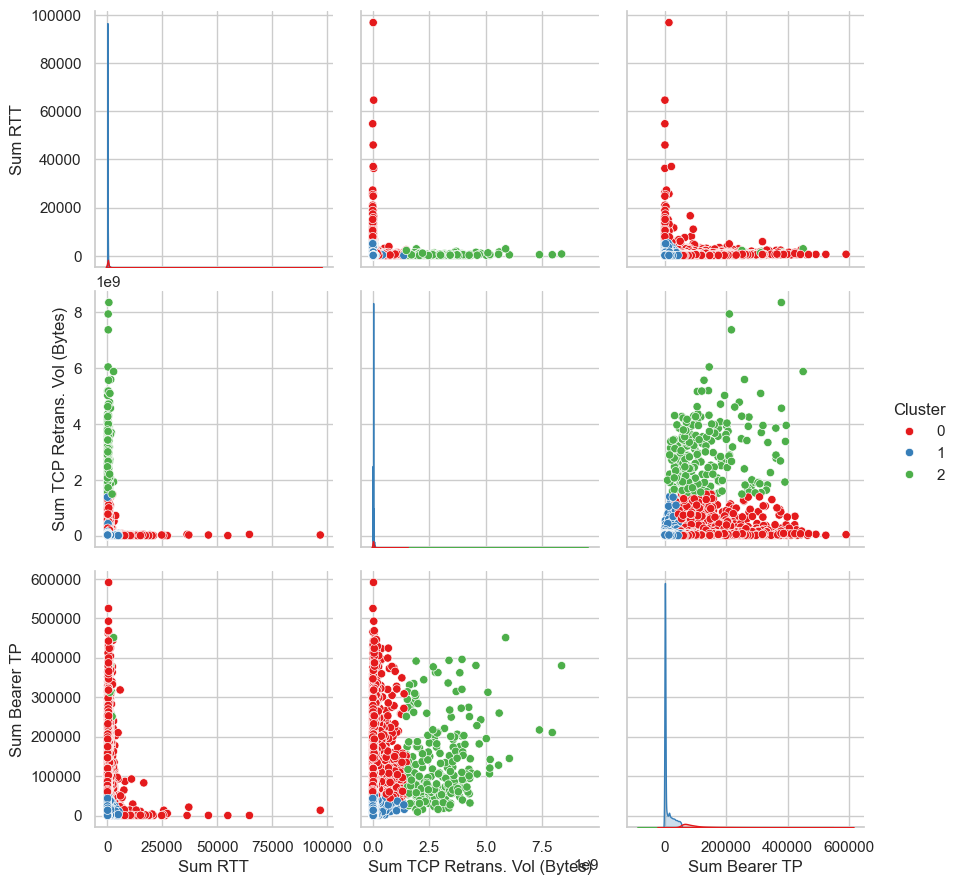

In [21]:

# Select relevant columns for clustering
experience_metrics = [
    'Sum RTT',
    'Sum TCP Retrans. Vol (Bytes)',
    'Sum Bearer TP',
]

# Drop rows with missing values in the selected columns
df_cluster = grouped_df[experience_metrics].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters using scatter plots
sns.set(style="whitegrid")

# Pairwise scatter plots for different pairs of experience metrics
sns.pairplot(df_cluster, hue="Cluster", palette="Set1", height=3, diag_kind="kde")
import matplotlib.pyplot as plt
plt.show()


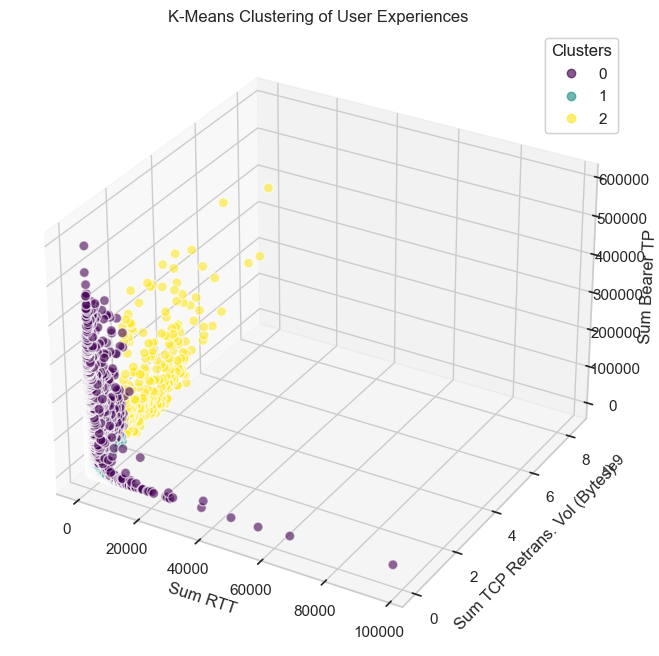

In [22]:
# to visiualize by 3D
experience_metrics = [
    'Sum RTT',
    'Sum TCP Retrans. Vol (Bytes)',
    'Sum Bearer TP',
]

# Drop rows with missing values in the selected columns
df_cluster = grouped_df[experience_metrics].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters using a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_cluster['Sum RTT'],
    df_cluster['Sum TCP Retrans. Vol (Bytes)'],
    df_cluster['Sum Bearer TP'],
    c=df_cluster['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolors='w'
)

ax.set_xlabel('Sum RTT')
ax.set_ylabel('Sum TCP Retrans. Vol (Bytes)')
ax.set_zlabel('Sum Bearer TP')
ax.set_title('K-Means Clustering of User Experiences')

legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

plt.show()
